In [1]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

#取消警告
import warnings
warnings.filterwarnings("ignore")

mp.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
mp.rcParams['axes.unicode_minus'] = False ## 正常显示负号

#不使用科学计数法
np.set_printoptions(suppress=True)

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform                             # 引入均分布设置参数
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error,confusion_matrix  #均方误差、混淆矩阵
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict # 引入K折交又验证

from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import time

# from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV

import shap
import json

import os   # 修改环境设置
from sklearn.model_selection import KFold,cross_validate
#  优化器
import bayes_opt
from bayes_opt import BayesianOptimization
import hyperopt 
from hyperopt import hp,fmin,tpe,Trials,partial
from hyperopt.early_stop import no_progress_loss
import optuna

In [3]:
pd.set_option("display.width",1000)
# pd.set_option("display.max_rows",None)
pd.set_option('display.max_rows', None) # 展示所有行
pd.set_option('display.max_columns', None) # 展示所有列

In [4]:
data=pd.read_excel("2020-2023.xlsx")

The following variables have been processed by excel software.
Leveraging a thorough understanding of the sport of basketball and the specifics of game outcome prediction, and considering the characteristics of the data indicators, an approach was adopted where features representing identical technical indicators for both the home and away teams are subtracted from each other. This method helped to mitigate situations where the technical statistics of the home and away teams were closely matched, reducing the interference of redundant information. Concurrently, it served to lower the dimensionality of the data, thereby enhancing the performance and efficiency of the predictive model.

In [5]:
data=data[[
    "game_FG","game_FGA",
        "game_FG%",
    "game_2P","game_2PA",
    "game_2P%",
    "game_3P","game_3PA",
    "game_3P%",
    "game_FT","game_FTA",
    "game_FT%","game_ORB","game_DRB",
        "game_TRB",
        "game_AST","game_STL","game_BLK","game_TOV","game_PF"
#     ,"game_PTS"
    ,"result"
    
    ,"H2_FG","H2_FGA"
            ,"H2_FG%",
    "H2_2P","H2_2PA",
    "H2_2P%",
    "H2_3P","H2_3PA",
    "H2_3P%",
    "H2_FT","H2_FTA",
    "H2_FT%","H2_ORB","H2_DRB",
        "H2_TRB",
        "H2_AST","H2_STL","H2_BLK","H2_TOV","H2_PF"
#     ,"H2_PTS",
# #
    ,"H3_FG","H3_FGA",
    "H3_FG%",
        "H3_2P","H3_2PA",
    "H3_2P%",
    "H3_3P","H3_3PA",
    "H3_3P%",
    "H3_FT","H3_FTA",
    "H3_FT%",
    "H3_ORB","H3_DRB",
        "H3_TRB",
        "H3_AST","H3_STL","H3_BLK","H3_TOV","H3_PF"
# #     ,"H3_PTS"
    
]]

# 1、exploratory analysis

In [6]:
data.describe()

,game_FG,game_FGA,game_FG%,game_2P,game_2PA,game_2P%,game_3P,game_3PA,game_3P%,game_FT,game_FTA,game_FT%,game_ORB,game_DRB,game_TRB,game_AST,game_STL,game_BLK,game_TOV,game_PF,result,H2_FG,H2_FGA,H2_FG%,H2_2P,H2_2PA,H2_2P%,H2_3P,H2_3PA,H2_3P%,H2_FT,H2_FTA,H2_FT%,H2_ORB,H2_DRB,H2_TRB,H2_AST,H2_STL,H2_BLK,H2_TOV,H2_PF,H3_FG,H3_FGA,H3_FG%,H3_2P,H3_2PA,H3_2P%,H3_3P,H3_3PA,H3_3P%,H3_FT,H3_FTA,H3_FT%,H3_ORB,H3_DRB,H3_TRB,H3_AST,H3_STL,H3_BLK,H3_TOV,H3_PF
count,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000
mean,0.514825,-0.133154,0.006687,0.208086,-0.394340,0.007765,0.306739,0.261186,0.006711,0.372507,0.436388,0.001020,0.064960,0.691105,0.756065,0.566577,-0.054178,0.183827,-0.046092,-0.211051,0.554178,0.283288,-0.177089,0.008383,0.158491,-0.221833,0.009978,0.124798,0.044744,0.006438,0.288949,0.325337,0.005706,-0.037736,0.366577,0.328841,0.241779,-0.025876,0.129111,-0.020485,-0.129919,0.487332,-0.156604,0.008651,0.238005,-0.304582,0.009816,0.249326,0.147978,0.007544,0.300270,0.352610,0.000894,-0.019946,0.553639,0.533693,0.395418,-0.052561,0.177898,-0.045013,-0.157682
std,6.624030,8.854296,0.075734,7.180854,11.346477,0.101918,5.477938,9.344893,0.120588,7.359160,8.753176,0.141547,5.387476,7.316811,9.289076,6.846604,4.039643,3.316935,5.074402,4.914687,0.497123,4.991156,5.857356,0.104845,4.980707,7.190067,0.141924,3.721108,5.711982,0.168733,4.906081,5.762681,0.225265,3.542779,4.939413,6.227484,4.782634,2.766919,2.235716,3.501817,3.230908,6.009494,7.381088,0.086762,6.202584,9.332564,0.117775,4.741423,7.521691,0.137210,5.967864,7.000976,0.169338,4.510571,6.145465,7.826738,6.007206,3.468409,2.781355,4.418321,3.982733
min,-27.000000,-33.000000,-0.313000,-25.000000,-51.000000,-0.392157,-19.000000,-42.000000,-0.433000,-26.000000,-30.000000,-0.480000,-22.000000,-27.000000,-30.000000,-22.000000,-13.000000,-17.000000,-21.000000,-20.000000,0.000000,-20.000000,-20.000000,-0.373000,-17.000000,-31.000000,-0.470238,-12.000000,-23.000000,-0.701000,-18.000000,-21.000000,-1.000000,-12.000000,-17.000000,-19.000000,-17.000000,-10.000000,-9.000000,-12.000000,-12.000000,-23.000000,-26.000000,-0.363636,-21.000000,-44.000000,-0.463203,-17.000000,-29.000000,-0.504926,-20.000000,-25.000000,-1.040739,-17.000000,-19.000000,-30.000000,-23.000000,-13.000000,-14.000000,-17.000000,-17.000000
25%,-4.000000,-6.000000,-0.045000,-5.000000,-8.000000,-0.061888,-3.000000,-6.000000,-0.071000,-5.000000,-5.000000,-0.092000,-4.000000,-4.000000,-5.000000,-4.000000,-3.000000,-2.000000,-3.000000,-4.000000,0.000000,-3.000000,-4.000000,-0.062000,-3.000000,-5.000000,-0.083333,-2.000000,-4.000000,-0.108000,-3.000000,-4.000000,-0.133000,-2.000000,-3.000000,-4.000000,-3.000000,-2.000000,-1.000000,-2.000000,-2.000000,-3.000000,-5.000000,-0.051662,-4.000000,-6.000000,-0.072804,-3.000000,-5.000000,-0.083333,-4.000000,-4.000000,-0.110464,-3.000000,-4.000000,-4.000000,-4.000000,-2.000000,-2.000000,-3.000000,-3.000000
50%,0.000000,0.000000,0.008000,0.000000,0.000000,0.009885,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.009620,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.009381,0.000000,0.

In [7]:
print(data.columns)

Index(['game_FG', 'game_FGA', 'game_FG%', 'game_2P', 'game_2PA', 'game_2P%', 'game_3P', 'game_3PA', 'game_3P%', 'game_FT', 'game_FTA', 'game_FT%', 'game_ORB', 'game_DRB', 'game_TRB', 'game_AST', 'game_STL', 'game_BLK', 'game_TOV', 'game_PF', 'result', 'H2_FG', 'H2_FGA', 'H2_FG%', 'H2_2P', 'H2_2PA', 'H2_2P%', 'H2_3P', 'H2_3PA', 'H2_3P%', 'H2_FT', 'H2_FTA', 'H2_FT%', 'H2_ORB', 'H2_DRB', 'H2_TRB', 'H2_AST', 'H2_STL', 'H2_BLK', 'H2_TOV', 'H2_PF', 'H3_FG', 'H3_FGA', 'H3_FG%', 'H3_2P', 'H3_2PA', 'H3_2P%', 'H3_3P', 'H3_3PA', 'H3_3P%', 'H3_FT', 'H3_FTA', 'H3_FT%', 'H3_ORB', 'H3_DRB', 'H3_TRB', 'H3_AST', 'H3_STL', 'H3_BLK', 'H3_TOV', 'H3_PF'], dtype='object')


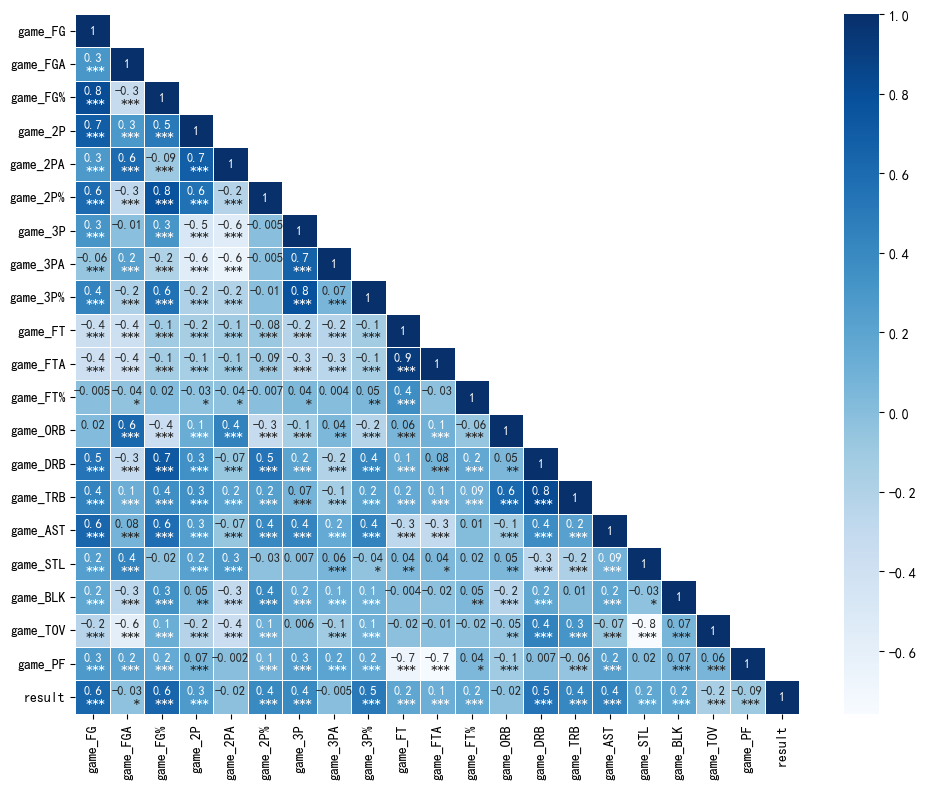

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# 计算相关系数矩阵
data1=data[[
    "game_FG","game_FGA",
        "game_FG%",
    "game_2P","game_2PA",
    "game_2P%",
    "game_3P","game_3PA",
    "game_3P%",
    "game_FT","game_FTA",
    "game_FT%","game_ORB","game_DRB",
        "game_TRB",
        "game_AST","game_STL","game_BLK","game_TOV","game_PF"
#     ,"game_PTS"
    ,"result"

]]
corr = data1.corr()

# 计算显著性水平
p_vals = pd.DataFrame(np.ones(corr.shape), columns=data1.columns, index=data1.columns)
for row in data1.columns:
    for col in data1.columns:
        _, p_vals.loc[row, col] = stats.pearsonr(data1[row], data1[col])

# 显著性标注函数
def significance_star(val):
    if val < 0.001:
        return '***'
    elif val < 0.01:
        return '**'
    elif val < 0.05:
        return '*'
    else:
        return ''

# 创建一个空的标注矩阵
annotations = np.empty_like(corr).astype(str)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        # 如果是对角线元素，只显示相关系数，不显示显著性星标
        if i == j:
            annotations[i, j] = f'{corr.iloc[i, j]:.1g}'
        else:
            # 在关联矩阵的右上角标注显著性
            annotations[i, j] = f'{corr.iloc[i, j]:.1g}\n{significance_star(p_vals.iloc[i, j]):>4}'

# 生成掩膜，只保留左下部分（包括对角线）
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=annotations, fmt='', cmap='Blues', cbar=True, linewidths=0.5, annot_kws={"fontsize":9})

# 添加标题和调整
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout()  # 调整布局以防止标签重叠

# 显示热力图
plt.show()

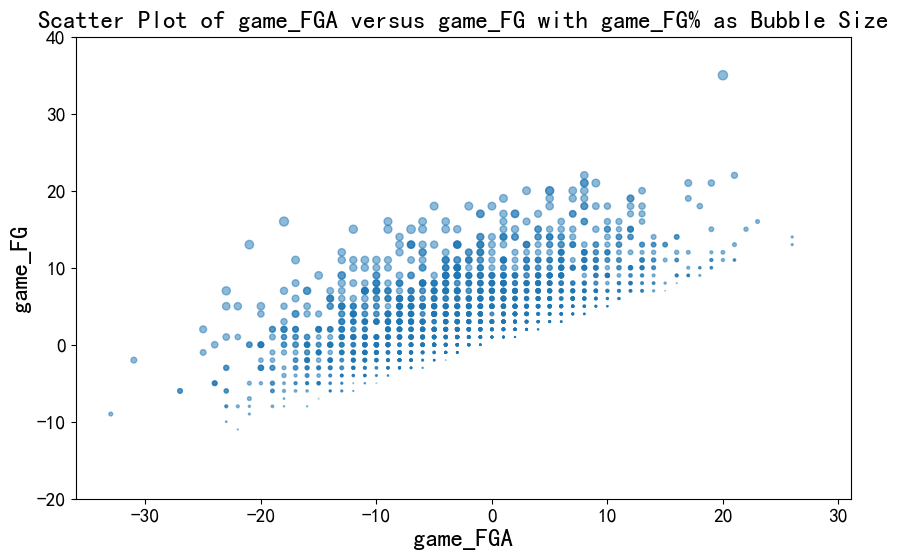

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

plt.scatter(data['game_FGA'], data['game_FG'], s=data['game_FG%']*150, alpha=0.5)
plt.xlabel('game_FGA',fontsize=18)
plt.ylabel('game_FG',fontsize=18)
plt.title('Scatter Plot of game_FGA versus game_FG with game_FG% as Bubble Size',fontsize=18)
# Bubble Chart of game_FGA, game_FG with game_FG% as Bubble Size


plt.ylim(-20,40)  # 根据数据动态调整y轴范围
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

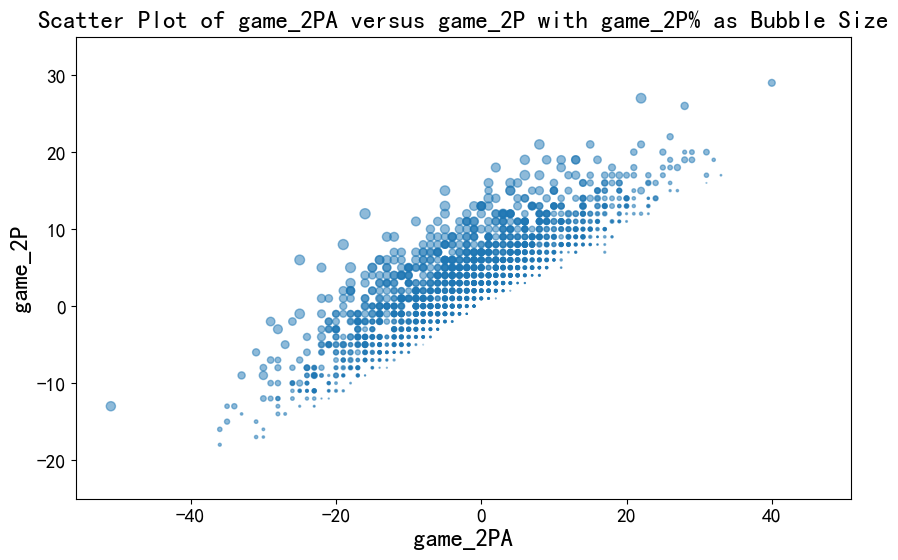

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(data['game_2PA'], data['game_2P'], s=data['game_2P%']*150, alpha=0.5)
plt.xlabel('game_2PA',fontsize=18)
plt.ylabel('game_2P',fontsize=18)
plt.title('Scatter Plot of game_2PA versus game_2P with game_2P% as Bubble Size',fontsize=18)

plt.ylim(-25,35)  # 根据数据动态调整y轴范围

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

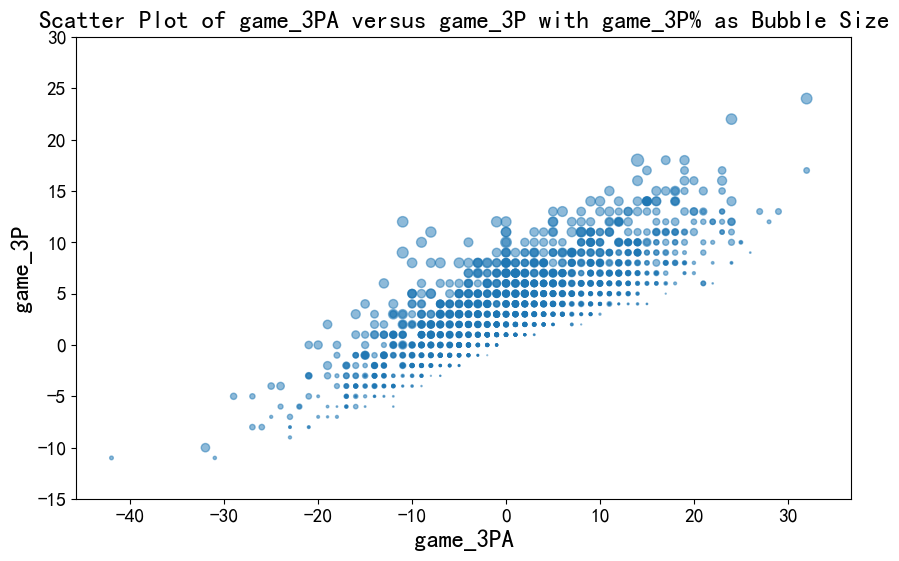

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(data['game_3PA'], data['game_3P'], s=data['game_3P%']*150, alpha=0.5)
plt.xlabel('game_3PA',fontsize=18)
plt.ylabel('game_3P',fontsize=18)
plt.title('Scatter Plot of game_3PA versus game_3P with game_3P% as Bubble Size',fontsize=18)

plt.ylim(-15,30)  # 根据数据动态调整y轴范围
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

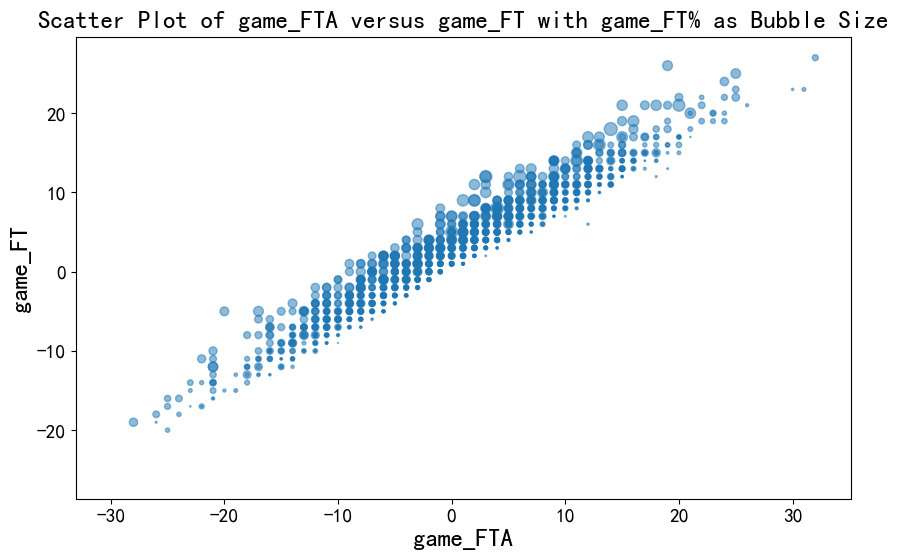

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(data['game_FTA'], data['game_FT'], s=data['game_FT%']*150, alpha=0.5)
plt.xlabel('game_FTA',fontsize=18)
plt.ylabel('game_FT',fontsize=18)
plt.title('Scatter Plot of game_FTA versus game_FT with game_FT% as Bubble Size',fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

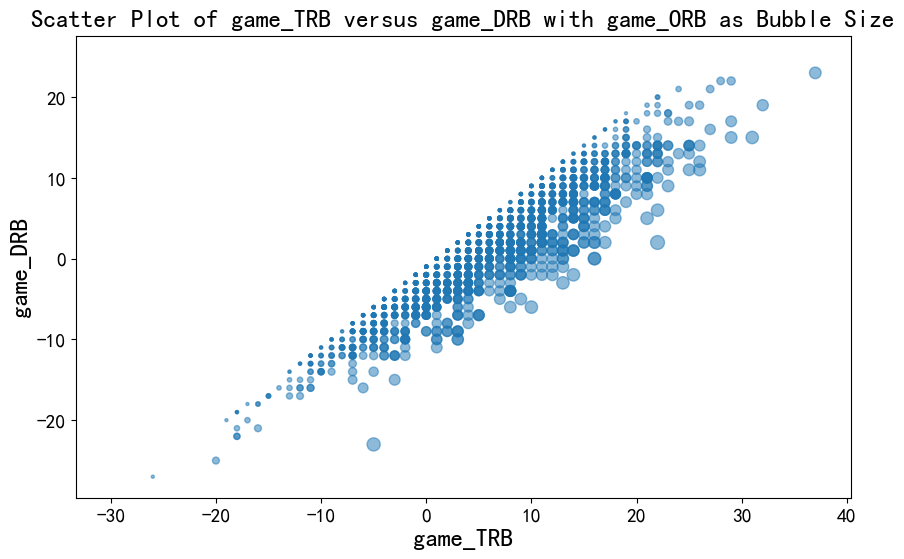

In [15]:
plt.figure(figsize=(10, 6))

plt.scatter(data['game_TRB'], data['game_DRB'], s=data['game_ORB']*5, alpha=0.5)
plt.xlabel('game_TRB',fontsize=18)
plt.ylabel('game_DRB',fontsize=18)
plt.title('Scatter Plot of game_TRB versus game_DRB with game_ORB as Bubble Size',fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# 2、Robustness test based on logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Be aware of the variables that are included in data, and change them when reading the data file if there is a mistake.

X = data[[
"game_FG%","game_2P%","game_3P%","game_FT%","game_ORB","game_DRB","game_AST","game_STL","game_BLK","game_TOV","game_PF"
]]
Y = data['result']
X = sm.add_constant(X)  # 添加常数项

model = sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.126993
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 3710
Model:                          Logit   Df Residuals:                     3698
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.8152
Time:                        02:16:18   Log-Likelihood:                -471.14
converged:                       True   LL-Null:                       -2549.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0324      0.084     -0.384      0.701      -0.198       0.133
game_FG%      28.7421      4

In [17]:
# Be aware of the variables that are included in data, and change them when reading the data file if there is a mistake.

X = data[[
"H2_FG%","H2_2P%","H2_3P%","H2_FT%","H2_ORB","H2_DRB","H2_AST","H2_STL","H2_BLK","H2_TOV","H2_PF"
]]
Y = data['result']
X = sm.add_constant(X)  # 添加常数项

model = sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.543572
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 3710
Model:                          Logit   Df Residuals:                     3698
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.2091
Time:                        02:16:35   Log-Likelihood:                -2016.7
converged:                       True   LL-Null:                       -2549.8
Covariance Type:            nonrobust   LLR p-value:                1.078e-221
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1736      0.038      4.512      0.000       0.098       0.249
H2_FG%         3.0548      1.

In [18]:
# Be aware of the variables that are included in data, and change them when reading the data file if there is a mistake.

X = data[[
    "H3_FG%","H3_2P%","H3_3P%","H3_FT%","H3_ORB","H3_DRB","H3_AST","H3_STL","H3_BLK","H3_TOV","H3_PF"
]]
Y = data['result']
X = sm.add_constant(X)  # 添加常数项

model = sm.Logit(Y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.427045
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 3710
Model:                          Logit   Df Residuals:                     3698
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.3786
Time:                        02:16:44   Log-Likelihood:                -1584.3
converged:                       True   LL-Null:                       -2549.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1238      0.044      2.800      0.005       0.037       0.211
H3_FG%         7.8625      2.

# 3、predictive models

# 3.1、Grouping of data sets

## 3.1.1、first two quarters period

In [50]:
x=data[[
        "H2_FG%","H2_2P%","H2_3P%","H2_FT%","H2_ORB","H2_DRB",
        "H2_AST","H2_STL","H2_BLK","H2_TOV","H2_PF"
        ]]
y=data["result"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

## 3.1.2、first three quarters period

In [40]:
x=data[[
"H3_FG%","H3_2P%","H3_3P%","H3_FT%","H3_ORB","H3_DRB","H3_AST","H3_STL","H3_BLK","H3_TOV","H3_PF"
        ]]
y=data["result"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2023)

## 3.1.3、full game period

In [70]:
x=data[[
"game_FG%","game_2P%","game_3P%","game_FT%","game_ORB","game_DRB",
"game_AST","game_STL","game_BLK","game_TOV","game_PF"
        ]]

y=data["result"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2023)

In [ ]:
x.shape

# 3.2 Modeling and Hyperparameter Tuning

To optimize prediction accuracy, this study employed methods such as Bayesian optimization and grid search to fine-tune the hyperparameters of seven mainstream machine learning algorithm models, including KNN, LightGBM, SVM, Random Forest, Logistic Regression, and Decision Tree. 

The detailed optimal parameter configurations under different time period datasets are as follows

### 1、lightgbm

In [20]:
import matplotlib.pyplot as mp
from lightgbm import log_evaluation,early_stopping
callbacks = [log_evaluation(period=100), early_stopping(stopping_rounds=20)]

In [25]:
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

gbm = lgb.LGBMClassifier(application="binary",

# 前三节目前最优 first three quarters period
# colsample_bytree= 0.468, learning_rate= 0.269, max_depth= 3, min_child_samples= 65, n_estimators= 200,num_leaves= 22, reg_alpha= 0.193, subsample= 0.532 

# 前两节目前最优 first two quarters period
# colsample_bytree= 0.531, learning_rate= 0.001, max_depth= 34, min_child_samples= 41, n_estimators= 483, num_leaves= 68, reg_alpha= 1.0, subsample= 1.0 

# 全场 full game period
# subsample= 0.625, reg_lambda= 0.78, reg_alpha= 0.56, num_leaves= 3, n_estimators= 250, min_child_samples= 24, max_depth= 10, learning_rate= 0.264, colsample_bytree= 0.9444
                         
                        )
scores=cross_validate(gbm,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"])
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())

[LightGBM] [Info] Number of positive: 1454, number of negative: 1217
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 2671, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544365 -> initscore=0.177930
[LightGBM] [Info] Start training from score 0.177930
[LightGBM] [Info] Number of positive: 1475, number of negative: 1196
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 2671, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552228 -> initscore=0.209675
[LightGBM] [Info] Start training from score 0.209675
[LightGBM] [Info

In [26]:
gbm = lgb.LGBMClassifier(application="binary",

# #                          前三节目前最优
# colsample_bytree= 0.468, learning_rate= 0.269, max_depth= 3, min_child_samples= 65, n_estimators= 200,num_leaves= 22, reg_alpha= 0.193, subsample= 0.532 
 

colsample_bytree= 0.531, learning_rate= 0.001, max_depth= 34, min_child_samples= 41, n_estimators= 483, num_leaves= 68, reg_alpha= 1.0, subsample= 1.0 

                        )
gbm.fit(x_train, y_train, 
        eval_set=[(x_test, y_test)], 
        eval_metric=["accuacy","acu"],
#         callbacks=callbacks
       )
print("准确率:",gbm.score(x_test, y_test)) 

y_pre = gbm.predict(x_test)

print("精准率：",metrics.precision_score(y_test,y_pre))  
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

prob=gbm.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))

[LightGBM] [Info] Number of positive: 1632, number of negative: 1336
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 2968, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549865 -> initscore=0.200126
[LightGBM] [Info] Start training from score 0.200126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [27]:
gbm_feature_importances=pd.DataFrame()
gbm_feature_importances["feature importances"]=gbm.feature_importances_
gbm_feature_importances["feature name"]=gbm.feature_name_
gbm_feature_importances.sort_values("feature importances",ascending=False)

,feature importances,feature name
9,1904,game_TOV
2,1803,game_3P%
0,1685,game_FG%
5,1547,game_DRB
3,1316,game_FT%
10,1300,game_PF
7,1182,game_STL
4,1169,game_ORB
1,1086,game_2P%
6,990,game_AST


In [ ]:
# #贝叶斯优化
def bayesopt_objective(n_estimators,max_depth,subsample,colsample_bytree,min_child_samples,learning_rate,reg_alpha,num_leaves):
#    定义评估器
# 需要调整的超参数等于目标函数的输入，不需要调整的超参数则为固定值输入
# 默认参数输入一定是浮点数，因此需要套上int函数处理成整数
    reg=XGBClassifier(objective="binary:logistic"  , 
                            n_estimators=int(n_estimators),
                              max_depth=int(max_depth),
                            subsample=subsample,
                              colsample_bytree=colsample_bytree,
                              min_child_samples=int(min_child_samples),
                              learning_rate=learning_rate,
                      reg_alpha=reg_alpha,
                      num_leaves=num_leaves,
                              verbose=False,
                              n_jobs=-1)
#     定义损失函数的输出，5折交叉验证下的结果，输出（acc）
# 注意：交叉验证需要使用数据，但我们不能让数据x，y成为目标函数的输入

    cv=KFold(n_splits=2,shuffle=True
#              ,random_state=12     #此处随机种子控制划分数据集
            )           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1,
                                  error_score="raise"      #如果交叉验证中的算法执行报错，则告诉我们错误的理由
                                  )
#     
    return np.mean(validation_loss["test_score"])

param_grid_simple={
                    "n_estimators":(50,1000),
                    "max_depth":(2,50),
                    "subsample":(0.5,1),
                    "colsample_bytree":(0,1),
                    "min_child_samples":(0,100),
                    "learning_rate":(0.001,3),
                    "reg_alpha":(0,1),
                    "num_leaves":(1,100)
    }


def para_bayes_opt(init_points,n_iter):
#     定义优化器，先实例化优化器
    opt=BayesianOptimization(bayesopt_objective,
                            param_grid_simple,
                            random_state=12)        #此处的随机种子控制不住
#     使用优化器，记住bayes_opt只支持最大化
    opt.maximize(init_points=init_points,          #抽取多少个初始观测值
                n_iter=n_iter                      #一共迭代多少次
                )
    #优化完成，取出最佳参数与最佳分数
    params_best=opt.max["params"]
    score_best=opt.max["target"]
    
    #打印
    print("\n","\n","best params：",params_best,
         "\n","\n","best cvscore：",score_best)
    
    return params_best,score_best

# 定义验证函数（非必须）
def bayes_opt_validation(params_best):
    reg=XGBClassifier(objective="binary:logistic"  , 
                                n_estimators=int(params_best["n_estimators"]),
                              max_depth=int(params_best["max_depth"]),
                              colsample_bytree=params_best["colsample_bytree"],
                               min_child_samples=params_best["min_child_samples"],
                              learning_rate=params_best["learning_rate"],
                              reg_alpha=params_best["reg_alpha"],
                      num_leaves=params_best["num_leaves"],
                      subsample=params_best["subsample"],
                              verbose=False,
                              n_jobs=-1)
    cv=KFold(n_splits=2,shuffle=True
#              ,random_state=12
            )           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1
                                  )
    return np.mean(validation_loss["test_score"])

In [ ]:
start=time.time()
params_best,score_best=para_bayes_opt(20,280)
print("takes %s minutes" % ((time.time()-start)/60))

validation_score=bayes_opt_validation(params_best)
print("\n","\n","validation_score",validation_score)

In [ ]:
# 随机网格调优
para_dict={
    "n_estimators":range(50,850,100),
#     "n_estimators":range(200,201,1),
    "min_child_samples":range(2,30,2),
#     "min_child_weight":np.linspace(0.01,40,20),
    "colsample_bytree":np.linspace(0.5,1,10),
    "max_depth":range(2,20,2),
    "num_leaves":range(1,21,2),
    "learning_rate":np.linspace(0.001,5.001,20),
    "subsample":np.linspace(0.5,1.0,5),
    "reg_alpha":np.linspace(0.01,1,10),
    "reg_lambda":np.linspace(0.01,1,10)
}

                    
gbm_rs=RandomizedSearchCV(estimator=gbm,
                      param_distributions=para_dict,
                          
                     cv=2,
                     scoring='accuracy',              #精度评价方式设定为“neg_log_loss“
                     n_iter=2000,                          #n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
                     refit=True,
                         n_jobs=-1
#                           ,random_state=3
                         )

gbm_rs.fit(x_train, y_train)
print("参数的最佳取值:{0}".format(gbm_rs.best_params_))
print("最佳模型得分:{0}".format(gbm_rs.best_score_))

### 2、xgboost

In [51]:
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

xg=XGBClassifier(
    objective="binary:logistic",

#     前三节最优 first three quarters period
# colsample_bytree= 0.574, learning_rate= 0.0425, max_depth= 33, min_child_weight= 6.66, n_estimators=323, subsample=0.4 
  
#   前两节  first two quarters period
colsample_bytree= 0.37, learning_rate= 0.025, max_depth= 7, min_child_weight= 6.1, n_estimators= 200, subsample= 0.54 
    
#     全场 full game period
# colsample_bytree= 0.7, learning_rate= 0.037, max_depth= 4, min_child_weight= 0.09, n_estimators= 705, subsample= 0.72 


                        )
scores=cross_validate(xg,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"]
#                       ,eval_set=[(x_test, y_test)], 
#         eval_metric=["auc","error"],
#         early_stopping_rounds=30
                     )
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())


0.785
0.748
0.713
0.727
0.771


In [52]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
xg=XGBClassifier(
    objective="binary:logistic"  ,    #二分类的逻辑回归问题，输出为概率

#     前三节最优   first three quarters period
# colsample_bytree= 0.574, learning_rate= 0.0425, max_depth= 33, min_child_weight= 6.66, n_estimators=323, subsample=0.4 


#     前两节  first two quarters period
colsample_bytree= 0.37, learning_rate= 0.025, max_depth= 7, min_child_weight= 6.1, n_estimators= 200, subsample= 0.54 
    
    
#         全场    full game period
# colsample_bytree= 0.7, learning_rate= 0.037, max_depth= 4, min_child_weight= 0.09, n_estimators= 705, subsample= 0.72 
 

)
xg.fit(x_train,y_train,
              eval_set=[(x_test, y_test)], 
        eval_metric=["auc","error"],
        early_stopping_rounds=50
      )
print("准确率:","xgboost score:",xg.score(x_test,y_test))

y_pre = xg.predict(x_test)

prob=xg.predict_proba(x_test)[:,1]

print("精准率（Precision）：",metrics.precision_score(y_test,y_pre))
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))


[0]	validation_0-auc:0.67574	validation_0-error:0.35310
[1]	validation_0-auc:0.72051	validation_0-error:0.33423
[2]	validation_0-auc:0.73398	validation_0-error:0.33019
[3]	validation_0-auc:0.74243	validation_0-error:0.32075
[4]	validation_0-auc:0.74396	validation_0-error:0.31806
[5]	validation_0-auc:0.74728	validation_0-error:0.31941
[6]	validation_0-auc:0.74815	validation_0-error:0.32615
[7]	validation_0-auc:0.74851	validation_0-error:0.31671
[8]	validation_0-auc:0.74879	validation_0-error:0.31671
[9]	validation_0-auc:0.75253	validation_0-error:0.31132
[10]	validation_0-auc:0.75397	validation_0-error:0.30593
[11]	validation_0-auc:0.75003	validation_0-error:0.31267
[12]	validation_0-auc:0.75117	validation_0-error:0.31536
[13]	validation_0-auc:0.74784	validation_0-error:0.31132
[14]	validation_0-auc:0.74710	validation_0-error:0.31671
[15]	validation_0-auc:0.74852	validation_0-error:0.30863
[16]	validation_0-auc:0.74944	validation_0-error:0.31132
[17]	validation_0-auc:0.75101	validation_

In [ ]:
xg.feature_importances_
xg.feature_names_in_
xg_feature_importances=pd.DataFrame()
xg_feature_importances["feature importances"]=xg.feature_importances_
xg_feature_importances["feature name"]=xg.feature_names_in_
xg_feature_importances.sort_values("feature importances",ascending=False)

In [ ]:
def bayesopt_objective(n_estimators,max_depth,subsample,colsample_bytree,min_child_weight,learning_rate):
#    定义评估器
# 需要调整的超参数等于目标函数的输入，不需要调整的超参数则为固定值输入
# 默认参数输入一定是浮点数，因此需要套上int函数处理成整数
    reg=XGBClassifier(objective="binary:logistic"  , 
                            n_estimators=int(n_estimators),
                              max_depth=int(max_depth),
                            subsample=subsample,
                              colsample_bytree=colsample_bytree,
                              min_child_weight=min_child_weight,
                              learning_rate=learning_rate,
                              verbose=False,
                              n_jobs=-1)
#     定义损失函数的输出，5折交叉验证下的结果，输出（acc）
# 注意：交叉验证需要使用数据，但我们不能让数据x，y成为目标函数的输入

    cv=KFold(n_splits=2,shuffle=True
#              ,random_state=10              #此处随机种子控制划分数据集
            )           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1,
                                  error_score="raise"      #如果交叉验证中的算法执行报错，则告诉我们错误的理由
                                  )
#     
    return np.mean(validation_loss["test_score"])

param_grid_simple={
                    "n_estimators":(50,1000),
                    "max_depth":(1,50),
                    "subsample":(0,1),
                    "colsample_bytree":(0,1),
                    "min_child_weight":(0,20),
                    "learning_rate":(0.001,5)
    }


def para_bayes_opt(init_points,n_iter):
#     定义优化器，先实例化优化器
    opt=BayesianOptimization(bayesopt_objective,
                            param_grid_simple,
                            random_state=12)        #此处的随机种子控制不住
#     使用优化器，记住bayes_opt只支持最大化
    opt.maximize(init_points=init_points,          #抽取多少个初始观测值
                n_iter=n_iter                      #一共迭代多少次
                )
    #优化完成，取出最佳参数与最佳分数
    params_best=opt.max["params"]
    score_best=opt.max["target"]
    
    #打印
    print("\n","\n","best params：",params_best,
         "\n","\n","best cvscore：",score_best)
    
    return params_best,score_best

# 定义验证函数（非必须）
def bayes_opt_validation(params_best):
    reg=XGBClassifier(objective="binary:logistic"  , 
                                n_estimators=int(params_best["n_estimators"]),
                              max_depth=int(params_best["max_depth"]),
                      subsample=params_best["subsample"],        
                      colsample_bytree=params_best["colsample_bytree"],
                               min_child_weight=params_best["min_child_weight"],
                              learning_rate=params_best["learning_rate"],
                              verbose=False,
                              n_jobs=-1)
    cv=KFold(n_splits=2,shuffle=True
#              ,random_state=10
            )           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1
                                  )
    return np.mean(validation_loss["test_score"])

In [ ]:
start=time.time()
params_best,score_best=para_bayes_opt(20,280)
print("takes %s minutes" % ((time.time()-start)/60))

validation_score=bayes_opt_validation(params_best)
print("\n","\n","validation_score",validation_score)

In [ ]:
# 调优
para_dict={
    "n_estimators":range(50,800,50),
#     "max_depth":range(2,20,1),
#     "learning_rate":np.linspace(0.01,5,100),
#     "subsample":np.linspace(0.5,1.2,30),
#     "colsample_bytree":np.linspace(0.5,2,20),
#     "min_child_weight":range(1,9,1)
    
#     "n_estimators":range(10,300,30),
#     "n_estimators":range(200,201,1),
#     "min_child_samples":range(6,30,2),
    "min_child_weight":np.linspace(0.01,40,20),
    "colsample_bytree":np.linspace(0.5,1,10),
    "max_depth":range(1,30,1),
    "learning_rate":np.linspace(0.01,5.01,50),
    "subsample":np.linspace(0.2,1.0,10),
#     "reg_alpha":np.linspace(0.01,1,10),
    "gamma":np.linspace(0.01,1,10)
}

xg_rs=RandomizedSearchCV(estimator=xg,
                      param_distributions=para_dict,
                     cv=2,
                     scoring='accuracy',              #精度评价方式设定为“neg_log_loss“
                     n_iter=300,                          #n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
                     n_jobs=-1)

xg_rs=xg_rs.fit(x_train,y_train)

xg_best=xg_rs.best_params_
print(xg_best)

print(xg_rs.best_score_)
# print('详细结果:\n', pd.DataFrame.from_dict(xg_rs.cv_results_))

y_pre = xg_rs.predict(x_test)
#     print(y_test[y_pre==1])
    # print(y_pre==1)
    
prob=xg_best.predict_proba(x_test)[:,1]

print("xgboost 准确率:",xg_rs.score(x_test,y_test))
print("精准率（Precision）：",metrics.precision_score(y_test,y_pre))
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))

###  3、Decision Tree

In [45]:
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

estimator_tree=DecisionTreeClassifier(
# 全场  full game period
# min_samples_leaf= 36, min_impurity_decrease= 0.01,max_depth= 10, criterion= 'entropy'
  
# 前三节  first three quarters period
min_samples_leaf= 96, min_impurity_decrease=0.01, max_depth=45, criterion= 'entropy'

# 前两节   first two quarters period
# min_samples_leaf= 91, min_impurity_decrease=0.01, max_depth= 135, criterion='entropy'
)
                   
scores=cross_validate(estimator_tree,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"])
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())

0.787
0.748
0.720
0.739
0.761


In [ ]:
estimator_tree=DecisionTreeClassifier(
#     criterion='entropy',max_depth=5

)
estimator_tree.fit(x_train,y_train)

ret=estimator_tree.score(x_test,y_test)

tree_pre=estimator_tree.predict(x_test)
# print(tree_pre)                     # 预测结果

print("准确率",ret)

print("精准率（Precision）：",metrics.precision_score(y_test,tree_pre))
print("召回率(Recall):",metrics.recall_score(y_test,tree_pre))
print("F1-score:",metrics.f1_score(y_test,tree_pre))

prob=estimator_tree.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))

In [ ]:
# 调优
para_dict={
    "criterion":["entropy","gini"],
    "max_depth":range(10,200,5),
    "min_samples_leaf":range(1,100,5),
    "min_impurity_decrease":np.linspace(0.01,1,20)
#     "class_weight":np.linspace(0,10,100)
    
}

estimator_best_tree=RandomizedSearchCV(estimator=estimator_tree,
                                      param_distributions=para_dict,
                                      cv=3,
                                      n_iter=1000,
                                      n_jobs=-1)

estimator_best_tree=estimator_best_tree.fit(x_train,y_train)

print(estimator_best_tree.best_params_)
print("训练集拟合分数（需要测试集分数更大）",estimator_best_tree.best_score_)

y_pre = estimator_best_tree.predict(x_test)
#     print(y_test[y_pre==1])
    # print(y_pre==1)
    
print("xgboost 准确率:",estimator_best_tree.score(x_test,y_test))
print("精准率（Precision）：",metrics.precision_score(y_test,y_pre))
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

prob=estimator_best_tree.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))


###  4、Random Forest

In [75]:
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

rf=RandomForestClassifier(oob_score=True,
# 前两节  first two quarters period
# max_depth= 245, min_impurity_decrease= 0.006, min_samples_leaf= 253, n_estimators= 190,         
                           
#  前三节     first three quarters period       
# n_estimators=300, min_samples_leaf= 5, max_depth= 275,

#  全场   full game period

# n_estimators=300, min_samples_leaf= 5, max_depth= 275,

                          
                          criterion= 'gini',
                         )
scores=cross_validate(rf,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"])
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())

0.970
0.914
0.905
0.910
0.918


In [ ]:
rf=RandomForestClassifier(oob_score=True,
# 前两节
# max_depth= 245, min_impurity_decrease= 0.006, min_samples_leaf= 253, n_estimators= 190, 

#  前三节      
# n_estimators=300, min_samples_leaf= 5, max_depth= 275,
# #  全场
                          
#n_estimators=300, min_samples_leaf= 5, max_depth= 275,
                          
criterion= 'gini',
random_state=9
)
rf.fit(x_train,y_train)

ret=rf.score(x_test,y_test)
print("正确率：",ret)

rf_pre=rf.predict(x_test)



print("精准率（Precision）：",metrics.precision_score(y_test,rf_pre))
print("召回率(Recall):",metrics.recall_score(y_test,rf_pre))
print("F1-score:",metrics.f1_score(y_test,rf_pre))

prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))


In [ ]:
rf1=RandomForestClassifier()
param={"n_estimators":range(100,600,100),
       "max_depth":range(5,305,30),
#        "max_features":range(5,20,1),
       "min_samples_leaf":range(5,105,20)}


estimator_best_rf=RandomizedSearchCV(estimator=rf1,
                                      param_distributions=param,
                                      cv=2,
                                      n_iter=1000,
                                      n_jobs=-1)

estimator_best_rf.fit(x_train,y_train)
print("随机森林预测的准确率为：/n",estimator_best_rf.score(x_test,y_test))

print(estimator_best_rf.best_params_)
print("训练集拟合分数（需要测试集分数更大）",estimator_best_rf.best_score_)

y_pre = estimator_best_rf.predict(x_test)
    
print("xgboost 准确率:",estimator_best_rf.score(x_test,y_test))
print("精准率（Precision）：",metrics.precision_score(y_test,y_pre))
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

prob=estimator_best_rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)
print("AUC指标：",roc_auc_score(y_test,prob))


In [ ]:
def bayesopt_objective(n_estimators,max_depth,min_impurity_decrease,min_samples_leaf):
#    定义评估器
# 需要调整的超参数等于目标函数的输入，不需要调整的超参数则为固定值输入
# 默认参数输入一定是浮点数，因此需要套上int函数处理成整数
    reg=RandomForestClassifier(n_estimators=int(n_estimators),
                              max_depth=int(max_depth),
#                               max_features=int(max_features),
                                min_samples_leaf=int(min_samples_leaf),
                              min_impurity_decrease=min_impurity_decrease,
                              verbose=False,
                              n_jobs=-1)
#     定义损失函数的输出，5折交叉验证下的结果，输出（acc）
# 注意：交叉验证需要使用数据，但我们不能让数据x，y成为目标函数的输入

    cv=KFold(n_splits=2,shuffle=True)           #此处随机种子控制划分数据集
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1,
                                  error_score="raise"      #如果交叉验证中的算法执行报错，则告诉我们错误的理由
                                  
                                  )
#     
    return np.mean(validation_loss["test_score"])

param_grid_simple={
                    "n_estimators":(50,800),
                    "max_depth":(1,100),
#                     "max_features":(1,20),
                    "min_impurity_decrease":(0,1),
                    "min_samples_leaf":(5,300)
    }


def para_bayes_opt(init_points,n_iter):
#     定义优化器，先实例化优化器
    opt=BayesianOptimization(bayesopt_objective,
                            param_grid_simple,
                            random_state=12)        #此处的随机种子控制不住
#     使用优化器，记住bayes_opt只支持最大化
    opt.maximize(init_points=init_points,          #抽取多少个初始观测值
                n_iter=n_iter                      #一共迭代多少次
                                
                )
    #优化完成，取出最佳参数与最佳分数
    params_best=opt.max["params"]
    score_best=opt.max["target"]
    
    #打印
    print("\n","\n","best params：",params_best,
         "\n","\n","best cvscore：",score_best)
    
    return params_best,score_best

# 定义验证函数（非必须）
def bayes_opt_validation(params_best):
    reg=RandomForestClassifier(n_estimators=int(params_best["n_estimators"]),
                              max_depth=int(params_best["max_depth"]),
#                               max_features=int(params_best["max_features"]),
                                min_samples_leaf=int(params_best["min_samples_leaf"]),
                              min_impurity_decrease=params_best["min_impurity_decrease"],
                              verbose=False,
                              n_jobs=-1)
    cv=KFold(n_splits=2,shuffle=True)           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1
                                  )
    return np.mean(validation_loss["test_score"])

In [ ]:
start=time.time()
params_best,score_best=para_bayes_opt(20,280)
print("takes %s minutes" % ((time.time()-start)/60))

validation_score=bayes_opt_validation(params_best)
print("\n","\n","validation_score",validation_score)

### 5、SVM 

In [67]:
from sklearn import svm
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

svm1 = svm.SVC(
# 前两节  first two quarters period
#                 kernel="rbf",
#     C= 1.05, gamma= 0.001,
    
# 前三节  first three quarters period
# C= 2.1, gamma= 0.001, kernel= 'rbf',

# 全场   full game period
#     kernel="rbf",
#     C= 6.96, gamma= 0.0001,
    
        decision_function_shape="ovr",
               probability=True)

scores=cross_validate(svm1,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"])
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())


0.778
0.748
0.707
0.714
0.786


In [ ]:
from sklearn import svm
svm1 = svm.SVC(


# 前两节   first two quarters period
#                 kernel="rbf",
#     C= 1.05, gamma= 0.001,
    
# 前三节   first three quarters period
#     C= 2.1, gamma= 0.001, kernel= 'rbf',
        
# 全场   full game period
#                 kernel="rbf",
#     C= 6.96, gamma= 0.0001,
#     max_iter=30000,
        decision_function_shape="ovr",
                   probability=True)


svm1.fit(x_train,y_train)
svm1_pre=svm1.predict(x_test) 
print("svm score（准确率）:",svm1.score(x_test,y_test))
print("精准率（Precision）：",metrics.precision_score(y_test,svm1_pre))
print("召回率(Recall):",metrics.recall_score(y_test,svm1_pre))
print("F1-score:",metrics.f1_score(y_test,svm1_pre))

prob=svm1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)

print("AUC指标：",roc_auc_score(y_test,prob))

In [ ]:
def bayesopt_objective(C,gamma):
#    定义评估器
# 需要调整的超参数等于目标函数的输入，不需要调整的超参数则为固定值输入
# 默认参数输入一定是浮点数，因此需要套上int函数处理成整数
    reg=svm.SVC(C=C,
                              gamma=gamma,
                             kernel=
                "rbf",
#                 "linear",
                decision_function_shape="ovr",
                   probability=True,
                              verbose=False,
#                               n_jobs=-1
                 
               )
#     定义损失函数的输出，5折交叉验证下的结果，输出（acc）
# 注意：交叉验证需要使用数据，但我们不能让数据x，y成为目标函数的输入

    cv=KFold(n_splits=3,shuffle=True
#              ,random_state=123         #此处随机种子控制划分数据集
            )           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1,
                                    
                                  error_score="raise"      #如果交叉验证中的算法执行报错，则告诉我们错误的理由
                                  
                                  )
#     
    return np.mean(validation_loss["test_score"])

param_grid_simple={
                    "C":(0.01,100),
                    "gamma":(0.01,100),

    }


def para_bayes_opt(init_points,n_iter):
#     定义优化器，先实例化优化器
    opt=BayesianOptimization(bayesopt_objective,
                            param_grid_simple,
                            random_state=12)        #此处的随机种子控制不住
#     使用优化器，记住bayes_opt只支持最大化
    opt.maximize(init_points=init_points,          #抽取多少个初始观测值
                n_iter=n_iter                      #一共迭代多少次
                                
                )
    #优化完成，取出最佳参数与最佳分数
    params_best=opt.max["params"]
    score_best=opt.max["target"]
    
    #打印
    print("\n","\n","best params：",params_best,
         "\n","\n","best cvscore：",score_best)
    
    return params_best,score_best

# 定义验证函数（非必须）
def bayes_opt_validation(params_best):
    reg=svm.SVC(C=int(params_best["C"]),
                              gamma=int(params_best["gamma"]),
                               decision_function_shape="ovr",
                               probability=True,
                              verbose=False,
                              n_jobs=-1
                
               )
    cv=KFold(n_splits=3,shuffle=True
#              ,random_state=123
            )           
    validation_loss=cross_validate(reg,x,y,
                                  scoring="accuracy",
                                  cv=cv,
                                  verbose=False,   #不打印具体流程
                                  n_jobs=-1
                                    
                                  )
    return np.mean(validation_loss["test_score"])

In [ ]:
start=time.time()
params_best,score_best=para_bayes_opt(10,100)
print("takes %s minutes" % ((time.time()-start)/60))

validation_score=bayes_opt_validation(params_best)
print("\n","\n","validation_score",validation_score)

In [66]:
# 调优
for k in ["linear","poly","rbf","sigmoid"]:
    clf=svm.SVR(kernel=k)
    clf.fit(x_train,y_train)
    confidence=clf.score(x_train,y_train)
    print(k,confidence)

linear 0.23370670987806708
poly 0.15325863604613676
rbf 0.26395928783817546
sigmoid -6650.014432862494


In [ ]:
# 网格搜索
from sklearn import svm
param={"C":np.linspace(0.001,20.001,20),
       "gamma":np.linspace(0.001,10.001,10),
#        'degree':range(1,5),
       "kernel":[
           "rbf"
#                  ,"linear"
#                  ,"poly","sigmoid"
                ]}
svm=svm.SVC(probability=True,max_iter=10000)
print("正在计算，请稍等、、、")
svm_gc=GridSearchCV(svm,param_grid=param,cv=2,n_jobs=-1)
svm_gc.fit(x_train,y_train)
print("支持向量机预测的准确率为：/n",svm_gc.score(x_test,y_test))

print(svm_gc.best_params_)
print("训练集拟合分数（需要测试集分数更大）",svm_gc.best_score_)

y_pre=svm_gc.predict(x_test) 
print("svm score（准确率）:",svm_gc.score(x_test,y_test))
print("精准率（Precision）：",metrics.precision_score(y_test,y_pre))
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

prob=svm_gc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
# roc_auc=auc(fpr,tpr)

print("AUC指标：",roc_auc_score(y_test,prob))


### 6、Linear Regression 

In [ ]:
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

estimator_lr=LogisticRegression()

scores=cross_validate(estimator_lr,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"])
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())

In [ ]:
estimator_lr=LogisticRegression()
estimator_lr.fit(x_train,y_train)

# print(estimator_lr.predict_proba(x_test))   #输出结果为胜负的可能概率
lr_pre=estimator_lr.predict(x_test)           #概率最大的即输出结果
print("正确率:",estimator_lr.score(x_test,y_test))          #正确率
print("精准率（Precision）：",metrics.precision_score(y_test,lr_pre))
print("召回率(Recall):",metrics.recall_score(y_test,lr_pre))
print("F1-score:",metrics.f1_score(y_test,lr_pre))

prob=estimator_lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)

print("AUC指标：",roc_auc_score(y_test,prob))

### 7、KNN 

In [64]:
n_splits=10
Kf=KFold(n_splits=n_splits,shuffle=True)

estimator_best_knn=KNeighborsClassifier(
# 前两节  first two quarters period
#      n_neighbors=47
#前三节   first three quarters period
#     n_neighbors=89
# 全场  full game period
#     n_neighbors=83
)

scores=cross_validate(estimator_best_knn,x_train,y_train,cv=Kf,scoring=["accuracy","f1","precision","recall","roc_auc"])
# print(scores)
print("%.3f" % scores["test_roc_auc"].mean())
print("%.3f" % scores["test_f1"].mean())
print("%.3f" % scores["test_accuracy"].mean())
print("%.3f" % scores["test_precision"].mean())
print("%.3f" % scores["test_recall"].mean())

0.766
0.741
0.701
0.713
0.772


In [65]:
estimator_knn=KNeighborsClassifier()
param_dict = {"n_neighbors": range(3,101,2)}
estimator_knn = GridSearchCV(estimator_knn, param_grid=param_dict, cv=5)

estimator_knn.fit(x_train,y_train)
# score=estimator_knn.score(x_test,y_test)
# score

print("在交叉验证中验证的最好结果:\n", estimator_knn.best_score_)
print("最好的参数模型:\n", estimator_knn.best_estimator_)

在交叉验证中验证的最好结果:
 0.7031529459859983
最好的参数模型:
 KNeighborsClassifier(n_neighbors=47)


In [ ]:
estimator_best_knn=KNeighborsClassifier(n_neighbors=3)

estimator_best_knn.fit(x_train,y_train)

# print(estimator_best_knn.predict_proba(x_test)) #概率
# print(estimator_best_knn.predict(x_test))  #预测结果

y_pre=estimator_best_knn.predict(x_test)
print(estimator_best_knn.score(x_test,y_test))
print("精准率（Precision）：",metrics.precision_score(y_test,y_pre))
print("召回率(Recall):",metrics.recall_score(y_test,y_pre))
print("F1-score:",metrics.f1_score(y_test,y_pre))

prob=estimator_best_knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,prob)
roc_auc=auc(fpr,tpr)


print("AUC指标：",roc_auc_score(y_test,prob))

# 4、SHAP Quantitative Analysis

In [53]:
import shap
import json

In [54]:
shap.initjs()

In [55]:
explainer_xg=shap.TreeExplainer(xg)
shap_values_xg=explainer_xg(x)

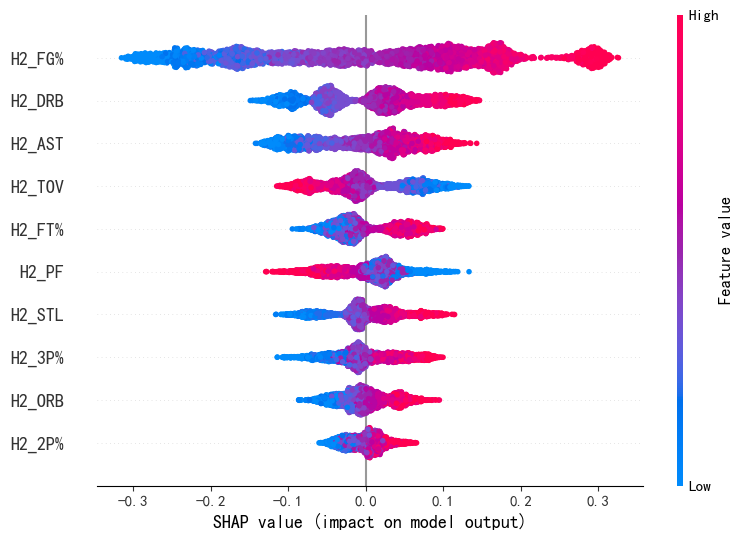

In [56]:
shap.summary_plot(shap_values_xg,x,
                  max_display=10
#                       ,matplotlib=True
                  ,show=False
                  )
mp.show()

In [57]:
feature_importance=pd.DataFrame()
feature_importance["feature"]=x.columns
feature_importance["importance"]=np.abs(shap_values_xg.values).mean(0)
feature_importance.sort_values("importance",ascending=False)

,feature,importance
0,H2_FG%,0.141959
5,H2_DRB,0.059693
6,H2_AST,0.056313
9,H2_TOV,0.045900
3,H2_FT%,0.035928
10,H2_PF,0.034856
7,H2_STL,0.032812
2,H2_3P%,0.032295
4,H2_ORB,0.025976
1,H2_2P%,0.018924


The 3708th sample is 2022-2023 NBA Finals G2

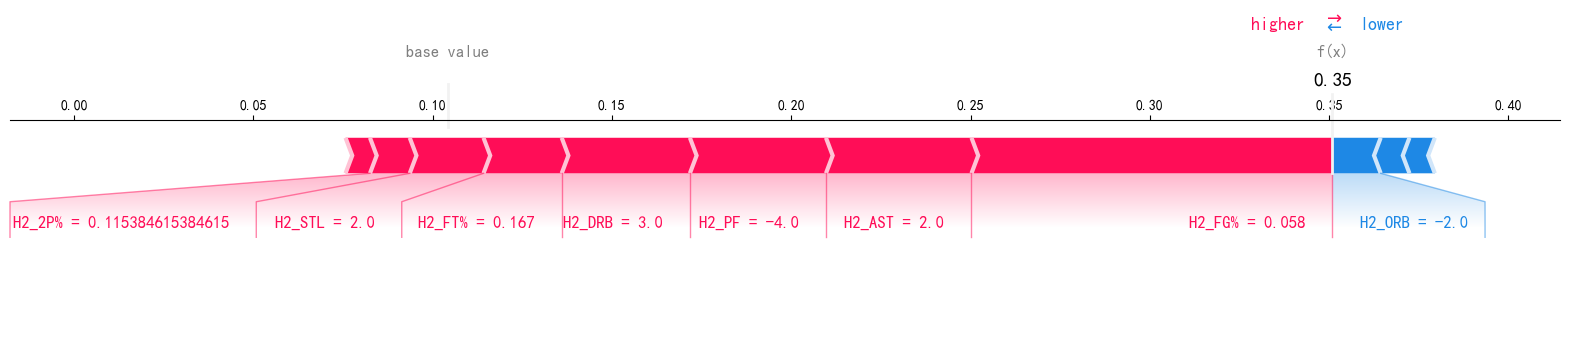

In [58]:
shap.plots.force(shap_values_xg[3708]
                 ,show=False
                 ,matplotlib=True
                 
                 )
mp.show()